    year  height         tas
0   2015     2.0  286.974762
1   2016     2.0  286.967560
2   2017     2.0  287.227020
3   2018     2.0  287.088013
4   2019     2.0  287.707550
5   2020     2.0  287.638336
6   2021     2.0  287.691467
7   2022     2.0  288.018005
8   2023     2.0  287.114929
9   2024     2.0  286.827972
10  2025     2.0  287.079895
11  2026     2.0  288.104950
12  2027     2.0  287.351288
13  2028     2.0  288.080750
14  2029     2.0  287.574005
15  2030     2.0  287.269012
16  2031     2.0  287.502808
17  2032     2.0  288.413269
18  2033     2.0  287.284485
19  2034     2.0  288.290161
20  2035     2.0  287.848389
21  2036     2.0  287.203888
22  2037     2.0  287.559967
23  2038     2.0  287.826935
24  2039     2.0  287.602692
25  2040     2.0  286.964264
26  2041     2.0  287.540924
27  2042     2.0  287.441315
28  2043     2.0  287.599823
29  2044     2.0  287.796570
30  2045     2.0  287.520355
31  2046     2.0  287.456970
32  2047     2.0  288.245728
33  2048     2

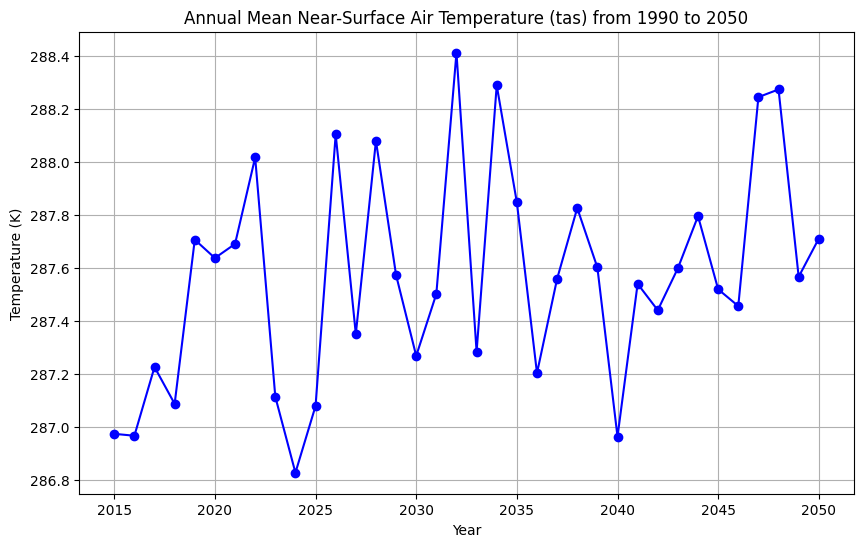

In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Carica il dataset NetCDF
file_path = '/content/drive/My Drive/Colab Notebooks/tas_Amon_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_201501-210012.nc'
ds = xr.open_dataset(file_path)

# Seleziona il periodo dal 1990 al 2050
start_year = 2015
end_year = 2050
time_range = slice(f'{start_year}-01-01', f'{end_year}-12-31')

# Seleziona il range di latitudini e longitudini
lat_range = slice(36.1286, 52.3731)
# Combinazione delle longitudini 350-360 e 0-28
lon_range_1 = slice(350.8630, 360)
lon_range_2 = slice(0, 28.9759)

# Filtra il dataset per il periodo e le coordinate specificate
tas_filtered_time = ds.tas.sel(time=time_range)
tas_filtered_lat_lon_1 = tas_filtered_time.sel(lat=lat_range, lon=lon_range_1)
tas_filtered_lat_lon_2 = tas_filtered_time.sel(lat=lat_range, lon=lon_range_2)

# Unisce i due filtri di longitudine
tas_filtered = xr.concat([tas_filtered_lat_lon_1, tas_filtered_lat_lon_2], dim='lon')

# Calcola la media annua per ogni anno
tas_annual_mean = tas_filtered.groupby('time.year').mean(dim=['time', 'lat', 'lon'])

# Converti i risultati in un DataFrame Pandas per una visualizzazione più semplice
tas_annual_mean_df = tas_annual_mean.to_dataframe().reset_index()
print(tas_annual_mean_df)
csv_file_path = 'tas_annual_mean_2015_2050.csv'
tas_annual_mean_df.to_csv(csv_file_path, index=False)
# Plotta le medie annue
plt.figure(figsize=(10, 6))
plt.plot(tas_annual_mean_df['year'], tas_annual_mean_df['tas'], marker='o', linestyle='-', color='b')
plt.title('Annual Mean Near-Surface Air Temperature (tas) from 1990 to 2050')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.grid(True)
plt.show()
plt.show()